In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data = pd.read_csv("./emails.csv")

In [24]:
df = data.copy()

In [25]:
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [36]:
X = df.iloc[:, 1 : 3001]

In [37]:
y = df.iloc[:,-1]

In [38]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

<Axes: >

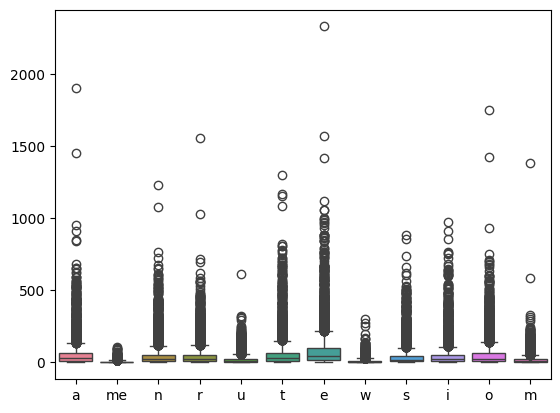

In [39]:
num = df[df.select_dtypes(['int64', 'float64']).columns.tolist()]

q1 = num.quantile(0.25)
q3 = num.quantile(0.75)

iqr = q3 - q1

lower = q1 - 1.5 * iqr
higher = q3 + 1.5 * iqr

outlier_mask = ((num > q3) | (num < q1))
top12 = outlier_mask.sum().sort_values(ascending=False).head(12).index.to_list()

sns.boxplot(data = df[top12])

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=41)

In [42]:
from sklearn.svm import SVC

In [43]:
svm = SVC(C=1.0, kernel='rbf', gamma='auto')
svm.fit(X_train, y_train)

SVC(gamma='auto')

In [44]:
y_svm = svm.predict(X_test)

In [45]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [46]:
print(f"Classification Report: {classification_report(y_test, y_svm)}")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_svm)}")
print(f"Accuracy Score: {accuracy_score(y_test, y_svm)}")

Classification Report:               precision    recall  f1-score   support

           0       0.90      0.97      0.94       359
           1       0.93      0.76      0.84       159

    accuracy                           0.91       518
   macro avg       0.92      0.87      0.89       518
weighted avg       0.91      0.91      0.91       518

Confusion Matrix: [[350   9]
 [ 38 121]]
Accuracy Score: 0.9092664092664092


In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [49]:
y_knn = knn.predict(X_test)

In [51]:
print(f"Classification Report: {classification_report(y_test, y_knn)}")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_knn)}")
print(f"Accuracy Score: {accuracy_score(y_test, y_knn)}")
print(knn.score(X_test,y_test))

Classification Report:               precision    recall  f1-score   support

           0       0.92      0.89      0.90       359
           1       0.76      0.82      0.79       159

    accuracy                           0.86       518
   macro avg       0.84      0.85      0.84       518
weighted avg       0.87      0.86      0.87       518

Confusion Matrix: [[318  41]
 [ 29 130]]
Accuracy Score: 0.8648648648648649
0.8648648648648649
